# IOWA HOUSING

<img src='housesbanner.png' />

Home values are influenced by many factors. Basically, there are two major aspects:

1. The environmental information, including location, local economy, school district, air quality, etc.
2. The characteristics information of the property, such as lot size, house size and age, the number of rooms, heating / AC systems, garage, and so on.

When people consider buying homes, usually the location has been constrained to a certain area such as not too far from the workplace.

With location factor pretty much fixed, the property characteristics information weights more in the home prices.
There are many factors describing the condition of a house, and they do not weigh equally in determining the home value. I present a feature selection process to examine the key features affecting their values.

## PART 1: COMBINE BOTH THE DATASETS

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from scipy.stats import skew
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook

warnings.filterwarnings('ignore') 

In [2]:
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

In [3]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [8]:
df.shape

(2919, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


### REMOVE SKEW FROM SalesPrice DATA

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution

In [11]:
skew(df_train.SalePrice), skew(np.log(df_train.SalePrice))

(1.880940746034036, 0.1212103673013655)

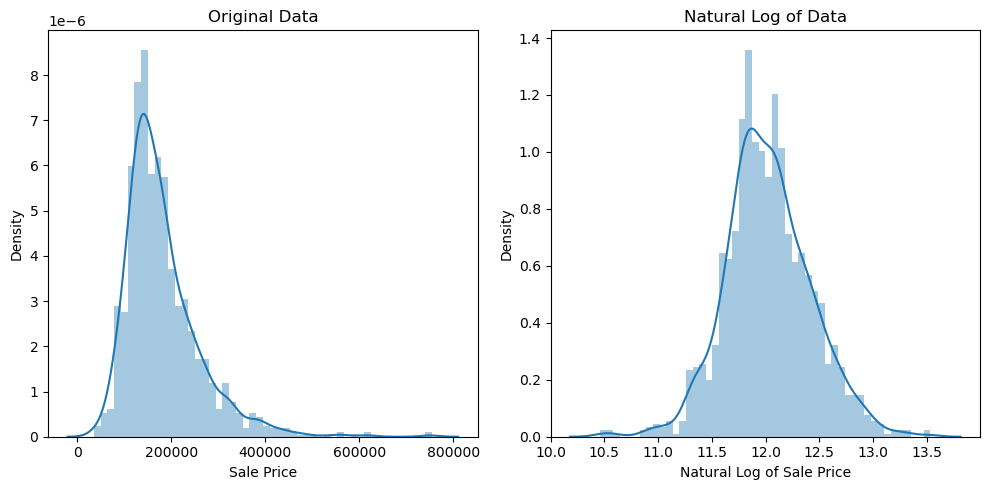

In [12]:
target = df_train[df_train.columns.values[-1]]
target_log = np.log(target)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(target, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(target_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

### FIND ALL CATEGORICAL DATA 

In [13]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
df_train.notnull().sum()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
for col in df.columns.values:
    if df[col].dtype == 'object':
        print (col)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [17]:
categorical_cols = [col for col in df.columns.values if df[col].dtype == 'object']

In [18]:
df.Alley.value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

### CREATE SEPARATE DATASETS FOR CONTINUOUS vs CATEGORICAL

Creating two data sets will allow us to handle the data in more appropriate ways.

In [19]:
df_cont = df.drop(categorical_cols, axis=1)
df_cat = df[categorical_cols]

In [20]:
df_cont.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## PART 2: DATA PREPROCESSING

### DEFINE MEDIAN ABSOLUTE DEVIATION FUNCTION 

Function found in this link: http://stackoverflow.com/a/22357811/5082694



In [21]:
def is_outlier(points, thresh = 3.5):
    if len(points.shape) == 1:
        points = points[:, None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

### HANDLE MISSING DATA FOR CONTINUOUS DATA

- If any column contains more than 50 entries of missing data, drop the column
- If any column contains fewer that 50 entries of missing data, replace those missing values with the median for that column
- Remove outliers using Median Absolute Deviation
- Calculate skewness for each variable and if greater than 0.75 transform it
- Apply the sklearn.Normalizer to each column

In [22]:
for col in df_cont.columns.values:
    if np.sum(df_cont[col].isnull()) > 50:
        df_cont = df_cont.drop(col, axis = 1)
    elif np.sum(df_cont[col].isnull()) > 0:
        median = df_cont[col].median()
        idx = np.where(df_cont[col].isnull())[0]
        df_cont[col].iloc[idx] = median

        outliers = np.where(is_outlier(df_cont[col].values))[0]
        df_cont[col].iloc[outliers] = median
        
        if skew(df_cont[col]) > 0.75:
            df_cont[col] = np.log(df_cont[col])
            df_cont[col] = df_cont[col].apply(lambda x: 0 if x == -np.inf else x)
        
#        df_cont[col] = Normalizer().fit_transform(df_cont[col].reshape(1,-1))[0]
        df_cont[col] = Normalizer().fit_transform([df_cont[col]])[0]

In [23]:
df_cont.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### HANDLE MISSING DATA FOR CATEGORICAL DATA 

- If any column contains more than 50 entries of missing data, drop the column
- If any column contains fewer that 50 entries of missing data, replace those values with the 'MIA'
- Apply the sklearn.LabelEncoder
- For each categorical variable determine the number of unique values and for each, create a new column that is binary

In [24]:
for col in df_cat.columns.values:
    if np.sum(df_cat[col].isnull()) > 50:
        df_cat = df_cat.drop(col, axis = 1)
        continue
    elif np.sum(df_cat[col].isnull()) > 0:
        df_cat[col] = df_cat[col].fillna('MIA')
        
    df_cat[col] = LabelEncoder().fit_transform(df_cat[col])
    
    num_cols = df_cat[col].max()
    for i in range(num_cols):
        col_name = col + '_' + str(i)
        df_cat[col_name] = df_cat[col].apply(lambda x: 1 if x == i else 0)
        
    df_cat = df_cat.drop(col, axis = 1)

#### OTHER PREPROCESSING OPTIONS

Eliminating samples or features with missing values

~~~
#delete the column without having to reassign df you can do:
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
~~~

~~~
df.loc[df.MasVnrType.isnull(), 'MasVnrType'] = 'None' # no good
df.loc[df.MasVnrType == 'None', 'MasVnrArea'] = 0
df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = df.LotFrontage.median()
df.loc[df.LotArea.isnull(), 'MasVnrType'] = 0
df.loc[df.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df.loc[df.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
df.loc[df.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
df.loc[df.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = df.BsmtFinSF1.median()
df.loc[df.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
df.loc[df.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = df.BsmtUnfSF.median()
df.loc[df.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0
df.loc[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
df.loc[df.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df.loc[df.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df.loc[df.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df.loc[df.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
df.loc[df.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
df.loc[df.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
df.loc[df.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
df.loc[df.MSZoning.isnull(), 'MSZoning'] = 'RL'
df.loc[df.Utilities.isnull(), 'Utilities'] = 'AllPub'
df.loc[df.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
df.loc[df.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
df.loc[df.Functional.isnull(), 'Functional'] = 'Typ'
df.loc[df.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
df.loc[df.SaleCondition.isnull(), 'SaleType'] = 'WD'
df.loc[df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
df.loc[df['SaleType'].isnull(), 'SaleType'] = 'NoSale'

#GarageYrBlt
df.loc[df.GarageYrBlt.isnull(), 'GarageYrBlt'] = df.GarageYrBlt.median()

#only one is null and it has type Detchd
df.loc[df['GarageArea'].isnull(), 'GarageArea'] = df.loc[df['GarageType']=='Detchd', 'GarageArea'].mean()
df.loc[df['GarageCars'].isnull(), 'GarageCars'] = df.loc[df['GarageType']=='Detchd', 'GarageCars'].median()
~~~

### MERGE NUMERIC AND CATEGORICAL DATASETS AND CREATE TRAINING AND TEST DATA

In [25]:
df_new = df_cont.join(df_cat)               # join the processed continuous and categorical data back together

df_train = df_new.iloc[:len(df_train) - 1]  # assign the original 1460 records that comprised the original training dataset, but with the processed data (all numerical now)
df_train = df_train.join(target_log)        # append the log of the SalePrice to the training dataset; this is the target, still labeled as SalePrice, but not the original prices

df_test = df_new.iloc[len(df_train) + 1:]   # assign the original 1459 records that comprised the original test dataset, but with the processed data (all numerical now)

X_train = df_train[df_train.columns.values[1:-1]]  # exclude SalePrice column from X_train
y_train = df_train[df_train.columns.values[-1]]    # assign the SalePrice column to y_train

X_test = df_test[df_test.columns.values[1:]]       # exclude the "Id" column from X_test

In [26]:
set(list(df_test.columns)) - set(list(X_test.columns))

{'Id'}

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 202 entries, Id to SaleCondition_4
dtypes: float64(9), int64(193)
memory usage: 4.5 MB


In [28]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_5', 'SaleType_6', 'SaleType_7', 'SaleType_8',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4', 'SalePrice'],
      dtype='object', length=203)

In [29]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SalePrice
0,1,60,8450,7,5,2003,2003,0.0,0.023500,0.0,...,0,0,0,0,0,0,0,0,1,12.247694
1,2,20,9600,6,8,1976,1976,0.0,0.024668,0.0,...,0,0,0,0,0,0,0,0,1,12.109011
2,3,60,11250,7,5,2001,2002,0.0,0.022162,0.0,...,0,0,0,0,0,0,0,0,1,12.317167
3,4,70,9550,7,5,1915,1970,0.0,0.019257,0.0,...,0,0,0,0,1,0,0,0,0,11.849398
4,5,60,14260,8,5,2000,2000,0.0,0.023232,0.0,...,0,0,0,0,0,0,0,0,1,12.429216


In [30]:
df_train.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SalePrice
1454,1455,20,7500,7,5,2004,2005,0.0,0.021553,0.0,...,0,0,0,0,0,0,0,0,1,12.128111
1455,1456,60,7917,6,5,1999,2000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,12.072541
1456,1457,20,13175,6,6,1978,1988,0.0,0.023903,0.0,...,0,0,0,0,0,0,0,0,1,12.254863
1457,1458,70,9042,7,9,1941,2006,0.0,0.020122,0.0,...,0,0,0,0,0,0,0,0,1,12.493130
1458,1459,20,9717,5,6,1950,1996,0.0,0.013943,0.0,...,0,0,0,0,0,0,0,0,1,11.864462


## CREATE ESTIMATOR AND APPLY CROSS VALIDATION

We can gauge the accuracy of our model by implementing an multi-fold cross validation and outputting the score. In this case, we choose to run 15 iterations and output the score as Root Mean Squared Error.

The results range from ~0.11-0.17 with a mean of ~0.14.



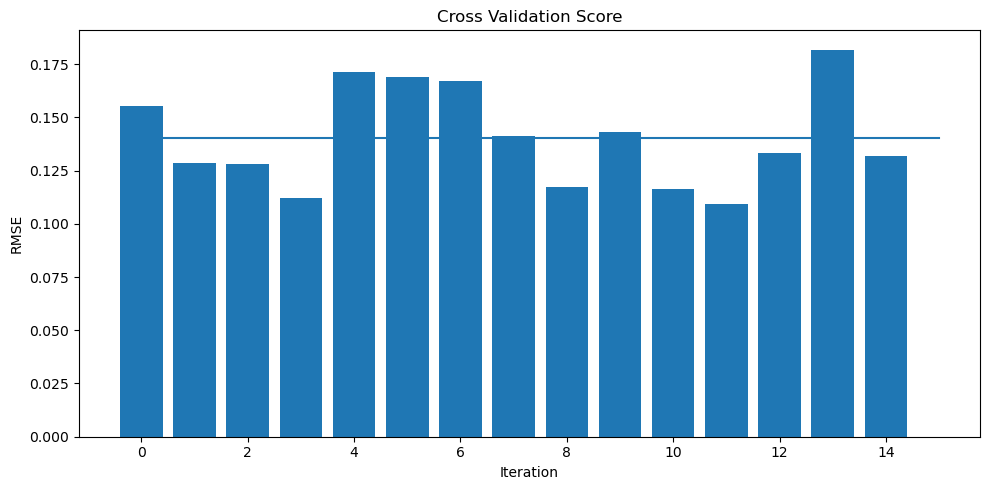

In [31]:
from sklearn.metrics import make_scorer, mean_squared_error

# Create a scorer using the mean squared error as the metric, compatible with cross_val_score
# False indicates that higher values are not better (minimization objective)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

rf_model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=15, scoring = scorer))

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

### FEATURE SELECTION

#### ASSESSING FEATURE IMPORTANCE WITH RANDOM FORESTS

Using a random forest, we can measure feature importance as the averaged impurity decrease computed from all decision trees in the forest without making any assumptions whether our data is linearly separable or not.

In [32]:
# Feature Selection: Embedded Method
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

feature_imp = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1',
       '1stFlrSF', 'YearBuilt', 'LotArea', 'CentralAir_0', 'OverallCond',
       'YearRemodAdd', 'Fireplaces', '2ndFlrSF', 'BsmtUnfSF', 'MSZoning_0',
       'OpenPorchSF', 'WoodDeckSF', 'MoSold', 'FullBath', 'MSSubClass'],
      dtype='object')

#### FEATURE SELECTOR THAT REMOVES ALL LOW-VARIANCE FEATURES 

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [33]:
# Feature Selection: Filter Method
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest

# Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X_train)

# Find feature names
feat_var_threshold = X_train.columns[vt.variances_ > threshold * (1-threshold)]

# select the top 20 
feat_var_threshold[0:20]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'],
      dtype='object')

In [34]:
set(feat_var_threshold[0:20]) - set(feat_imp_20)

{'3SsnPorch',
 'BedroomAbvGr',
 'EnclosedPorch',
 'HalfBath',
 'LowQualFinSF',
 'ScreenPorch',
 'TotRmsAbvGrd'}

In [35]:
set(feat_imp_20) - set(feat_var_threshold)

{'BsmtFinSF1',
 'BsmtUnfSF',
 'CentralAir_0',
 'GarageArea',
 'MSZoning_0',
 'TotalBsmtSF'}

#### UNIVARIATE FEATURE SELECTION 

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

In [36]:
# Feature Selection: Filter Method
X_scored = SelectKBest(score_func=f_regression, k='all').fit(X_train, y_train)
feature_scoring = pd.DataFrame({
        'feature': X_train.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

array(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'Foundation_2', 'ExterQual_2', 'Fireplaces',
       'HeatingQC_0', 'KitchenQual_0', 'KitchenQual_2', 'ExterQual_0',
       'Neighborhood_16', 'CentralAir_0', 'WoodDeckSF', 'Foundation_1'],
      dtype=object)

#### RECURSIVE FEATURE ELIMINATION

In [37]:
# Feature Selection: Wrapper Method

#Select 20 features from using recursive feature elimination (RFE) with logistic regression model.
from sklearn.feature_selection import RFE
rfe = RFE(LinearRegression(), n_features_to_select=20)
rfe.fit(X_train, y_train)

feature_rfe_scoring = pd.DataFrame({
        'feature': X_train.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20

array(['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea',
       'MSZoning_0', 'Neighborhood_15', 'Condition2_4', 'Condition2_5',
       'RoofStyle_1', 'RoofMatl_0', 'RoofMatl_1', 'RoofMatl_3',
       'RoofMatl_4', 'RoofMatl_5', 'RoofMatl_6', 'Exterior1st_2',
       'KitchenQual_0', 'Functional_2', 'Functional_6', 'SaleType_2'],
      dtype=object)

#### FINAL FEATURE SELECTION

In [38]:
# Combine selected features from various methods into a single array
features = np.hstack([
        feat_var_threshold[0:20],  # select top 20 features based on variance thresholding
        feat_imp_20,               # include top 20 features from feature importance
        feat_scored_20,            # add top 20 features from feature scoring
        feat_rfe_20                # append top 20 features from recursive feature elimination
    ])

features = np.unique(features)     # ensure uniqueness in the feature set
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-1stFlrSF
	-2ndFlrSF
	-3SsnPorch
	-BedroomAbvGr
	-BsmtFinSF1
	-BsmtUnfSF
	-CentralAir_0
	-Condition2_4
	-Condition2_5
	-EnclosedPorch
	-ExterQual_0
	-ExterQual_2
	-Exterior1st_2
	-Fireplaces
	-Foundation_1
	-Foundation_2
	-FullBath
	-Functional_2
	-Functional_6
	-GarageArea
	-GrLivArea
	-HalfBath
	-HeatingQC_0
	-KitchenQual_0
	-KitchenQual_2
	-LotArea
	-LowQualFinSF
	-MSSubClass
	-MSZoning_0
	-MoSold
	-Neighborhood_15
	-Neighborhood_16
	-OpenPorchSF
	-OverallCond
	-OverallQual
	-RoofMatl_0
	-RoofMatl_1
	-RoofMatl_3
	-RoofMatl_4
	-RoofMatl_5
	-RoofMatl_6
	-RoofStyle_1
	-SaleType_2
	-ScreenPorch
	-TotRmsAbvGrd
	-TotalBsmtSF
	-WoodDeckSF
	-YearBuilt
	-YearRemodAdd


After feature selection, it looks like out hypothesis is true that the property characteristics information weights more location in the home prices.

In [39]:
len(features)

49

### PULLING ALL TOGETHER

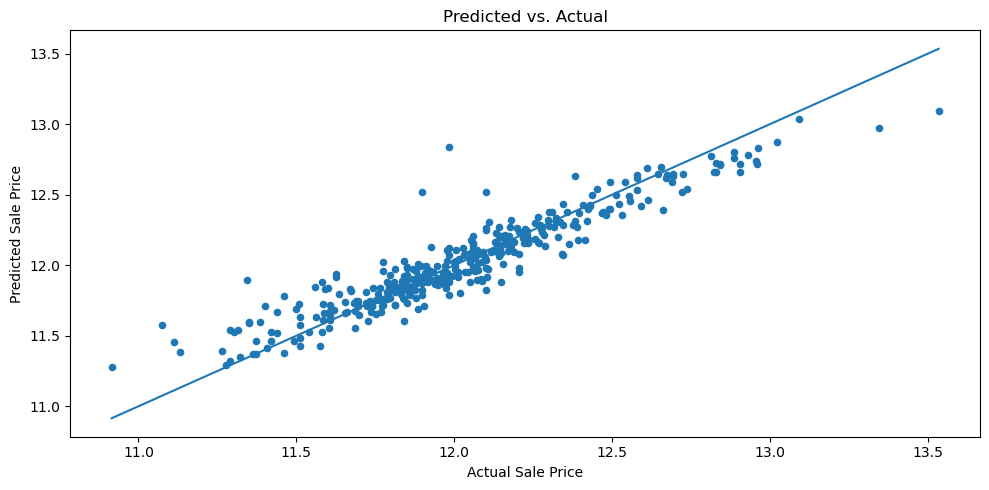

In [40]:
from sklearn.model_selection import train_test_split

X_train_final = X_train[features]  # select the top 50 features to train on
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_final, y_train)
rf_model = RandomForestRegressor(n_estimators=500, n_jobs=-1)  # instantiate the RandomForestRegressor model

rf_model.fit(X_train1, y_train1)    # train the Random Forest model on the training data
y_pred = rf_model.predict(X_test1)  # make predictions on the testing set

# Plot the predicted vs actual values for visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

# Add a diagonal line for reference (perfect prediction line)
# If all predicted values perfectly matched actual values, the points would fall exactly on this diagonal line
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

### Print the mean of the square root of the negative cross-validated scores using the specified scorer

* cross_val_score: Performs cross-validated scoring of the model.
* cv=15: Specifies 15-fold cross-validation, dividing the dataset into 15 subsets for training and testing.
* scoring=scorer: Specifies the scoring metric used, mean_squared_error.
* -cross_val_score(...): The negative of the cross-validated scores (higher values are not better)
* np.mean(...): Calculates the mean of the square root of negative cross-validated scores

In [41]:
print(np.mean(np.sqrt(-cross_val_score(estimator=rf_model, X=X_train1, y=y_train1, cv=15, scoring=scorer))))

0.14938647281899117


In [42]:
# Compute the natural logarithm of the given sale price ($208,500)
logprice = np.log(208500)

# Compute the original sale price by exponentiating the logarithmic value
saleprice = np.exp(logprice)

# Print the results, displaying the logarithmic and original sale prices
print ('log {0} for sale {1}'.format(logprice, saleprice))

log 12.247694320220994 for sale 208500.00000000012
